<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Oriba_ABCXYZ_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# ARIMA Forecast
---

In [26]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Aquisição e Transformações dos Dados



In [28]:
df = pd.read_excel('https://github.com/Rogerio-mack/ABCXYZ/raw/main/Oriba_Serie_Historica_20220831.xlsx')
df.head()

,Produto,Classificação,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,R2,CV
0,Bermuda Chino Bege,A,19.0,8.0,3.0,1.0,5.0,2.0,NaN,3.0,...,8.0,1.0,19.0,46.0,39.0,35.0,11.0,12.0,0.134325,1.018005
1,Calça Chino Azul Marinho,A,27.0,13.0,22.0,8.0,15.0,9.0,14.0,17.0,...,17.0,3.0,32.0,3.0,25.0,18.0,55.0,39.0,0.041770,0.611786
2,Calça Chino Bege,A,19.0,2.0,11.0,6.0,8.0,8.0,4.0,5.0,...,2.0,27.0,19.0,29.0,25.0,35.0,42.0,34.0,0.302400,0.682835
3,Calça Chino Cinza Chumbo,A,15.0,8.0,31.0,8.0,5.0,9.0,12.0,27.0,...,3.0,25.0,31.0,43.0,32.0,49.0,49.0,3.0,0.456033,0.646274
4,Calça Chino Cinza,A,26.0,28.0,21.0,3.0,5.0,2.0,1.0,11.0,...,12.0,17.0,2.0,26.0,23.0,18.0,41.0,38.0,0.132143,0.775989


In [29]:
df.columns

Index([      'Produto', 'Classificação',               1,               2,
                     3,               4,               5,               6,
                     7,               8,               9,              10,
                    11,              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,            'R2',            'CV'],
      dtype='object')

In [30]:
df = df.drop(columns=[ 'Classificação', 'R2', 'CV'])
df.head()

,Produto,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Bermuda Chino Bege,19.0,8.0,3.0,1.0,5.0,2.0,NaN,3.0,1.0,...,6.0,9.0,8.0,1.0,19.0,46.0,39.0,35.0,11.0,12.0
1,Calça Chino Azul Marinho,27.0,13.0,22.0,8.0,15.0,9.0,14.0,17.0,22.0,...,5.0,6.0,17.0,3.0,32.0,3.0,25.0,18.0,55.0,39.0
2,Calça Chino Bege,19.0,2.0,11.0,6.0,8.0,8.0,4.0,5.0,15.0,...,8.0,13.0,2.0,27.0,19.0,29.0,25.0,35.0,42.0,34.0
3,Calça Chino Cinza Chumbo,15.0,8.0,31.0,8.0,5.0,9.0,12.0,27.0,26.0,...,8.0,6.0,3.0,25.0,31.0,43.0,32.0,49.0,49.0,3.0
4,Calça Chino Cinza,26.0,28.0,21.0,3.0,5.0,2.0,1.0,11.0,2.0,...,3.0,3.0,12.0,17.0,2.0,26.0,23.0,18.0,41.0,38.0


In [31]:
np.matrix(df.drop(columns='Produto'))

matrix([[19.,  8.,  3., ..., 35., 11., 12.],
        [27., 13., 22., ..., 18., 55., 39.],
        [19.,  2., 11., ..., 35., 42., 34.],
        ...,
        [nan, nan, nan, ..., nan,  2.,  1.],
        [nan, nan, nan, ...,  1.,  4.,  2.],
        [nan, nan, nan, ...,  2.,  4.,  3.]])

In [32]:
np.matrix(df.drop(columns='Produto')).T

matrix([[19., 27., 19., ..., nan, nan, nan],
        [ 8., 13.,  2., ..., nan, nan, nan],
        [ 3., 22., 11., ..., nan, nan, nan],
        ...,
        [35., 18., 35., ..., nan,  1.,  2.],
        [11., 55., 42., ...,  2.,  4.,  4.],
        [12., 39., 34., ...,  1.,  2.,  3.]])

In [33]:
df_new = pd.DataFrame(np.matrix(df.drop(columns='Produto')).T)
df_new.columns = df.Produto.values

df_new.head()

,Bermuda Chino Bege,Calça Chino Azul Marinho,Calça Chino Bege,Calça Chino Cinza Chumbo,Calça Chino Cinza,Calça Chino Preta,Calça Chino Verde Oliva,Camiseta Essencial Com Bolso Branca,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Linho Azul Marinho,...,Kit Henley Branca & Azul,Kit Henley Algodão Orgânico Manga Longa Branca & Azul,Kit Henley Algodão Orgânico Azul,Kit Henley Manga Longa Branca & Azul,Kit Henley Algodão Orgânico Manga Longa Azul,Kit Henley Algodão Orgânico Branca,Kit Henley Algodão Orgânico Manga Longa Branca,Kit Henley Algodão Orgânico Manga Longa Off White,Kit Henley Algodão Orgânico Manga Longa Preta & Marinho,Kit Henley Algodão Orgânica Manga Longa Preta
0,19.0,27.0,19.0,15.0,26.0,29.0,33.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,13.0,2.0,8.0,28.0,21.0,23.0,55.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,22.0,11.0,31.0,21.0,33.0,2.0,48.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,8.0,6.0,8.0,3.0,1.0,7.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,15.0,8.0,5.0,5.0,7.0,4.0,27.0,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df = df_new

In [35]:
start='1/1/2020'
end='1/1/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
index_dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [36]:
df.index = index_dates
df.rename(columns={'Produto':''})

df.head()

,Bermuda Chino Bege,Calça Chino Azul Marinho,Calça Chino Bege,Calça Chino Cinza Chumbo,Calça Chino Cinza,Calça Chino Preta,Calça Chino Verde Oliva,Camiseta Essencial Com Bolso Branca,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Linho Azul Marinho,...,Kit Henley Branca & Azul,Kit Henley Algodão Orgânico Manga Longa Branca & Azul,Kit Henley Algodão Orgânico Azul,Kit Henley Manga Longa Branca & Azul,Kit Henley Algodão Orgânico Manga Longa Azul,Kit Henley Algodão Orgânico Branca,Kit Henley Algodão Orgânico Manga Longa Branca,Kit Henley Algodão Orgânico Manga Longa Off White,Kit Henley Algodão Orgânico Manga Longa Preta & Marinho,Kit Henley Algodão Orgânica Manga Longa Preta
2020-01-31,19.0,27.0,19.0,15.0,26.0,29.0,33.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,8.0,13.0,2.0,8.0,28.0,21.0,23.0,55.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,3.0,22.0,11.0,31.0,21.0,33.0,2.0,48.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,1.0,8.0,6.0,8.0,3.0,1.0,7.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,5.0,15.0,8.0,5.0,5.0,7.0,4.0,27.0,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.isnull().sum()

Bermuda Chino Bege                                          1
Calça Chino Azul Marinho                                    0
Calça Chino Bege                                            0
Calça Chino Cinza Chumbo                                    0
Calça Chino Cinza                                           0
                                                           ..
Kit Henley Algodão Orgânico Branca                         18
Kit Henley Algodão Orgânico Manga Longa Branca             22
Kit Henley Algodão Orgânico Manga Longa Off White          17
Kit Henley Algodão Orgânico Manga Longa Preta & Marinho    15
Kit Henley Algodão Orgânica Manga Longa Preta              16
Length: 505, dtype: int64

In [38]:
print( df.shape )
df = df.dropna(axis=1)
print( df.shape )

(24, 505)
(24, 20)


In [39]:
df.head()

,Calça Chino Azul Marinho,Calça Chino Bege,Calça Chino Cinza Chumbo,Calça Chino Cinza,Calça Chino Preta,Calça Chino Verde Oliva,Calça Chino Cáqui,Camisa Linho Azul Marinho Manga Curta,Camisa Linho Azul Mescla Manga Curta,Camisa Linho Preta Manga Curta,Camisa Linho Off White Manga Curta,Bermuda Chino Azul Marinho,Bermuda Chino Preta,Camisa Pima Clássica Azul,Camisa Pima Oxford Azul Claro,Camisa Pima Oxford Branca,Camisa Pima Clássica Branca,Camisa Jeans Claro Manga Longa,Camisa Jeans Escuro Manga Longa,Camisa Pima Oxford Listrada
2020-01-31,27.0,19.0,15.0,26.0,29.0,33.0,21.0,34.0,37.0,29.0,27.0,12.0,21.0,24.0,2.0,4.0,32.0,1.0,6.0,17.0
2020-02-29,13.0,2.0,8.0,28.0,21.0,23.0,19.0,24.0,19.0,23.0,21.0,26.0,13.0,13.0,8.0,4.0,14.0,11.0,1.0,2.0
2020-03-31,22.0,11.0,31.0,21.0,33.0,2.0,18.0,25.0,14.0,22.0,21.0,9.0,11.0,17.0,7.0,7.0,22.0,7.0,8.0,16.0
2020-04-30,8.0,6.0,8.0,3.0,1.0,7.0,4.0,1.0,2.0,1.0,3.0,5.0,2.0,4.0,1.0,1.0,7.0,5.0,6.0,1.0
2020-05-31,15.0,8.0,5.0,5.0,7.0,4.0,3.0,4.0,6.0,4.0,5.0,6.0,1.0,1.0,4.0,9.0,8.0,7.0,9.0,8.0


# Visualizando as demandas

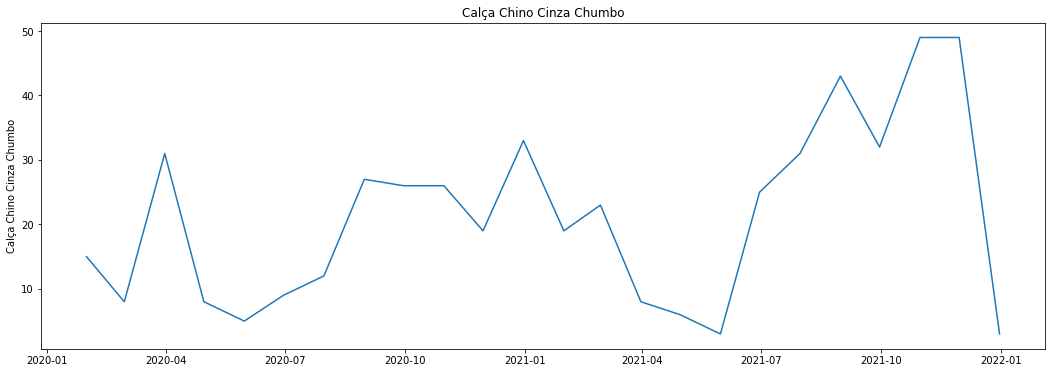

In [40]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[ df.columns[ 2 ] ] )
plt.title( df.columns[ 2 ] )

plt.show()

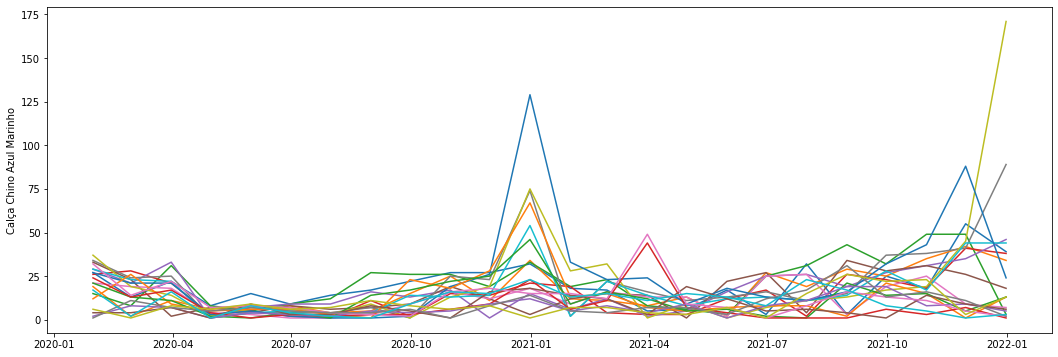

In [41]:
plt.figure( figsize=(18,6))

for produto in df:
  sns.lineplot( x=df.index, y=df[produto] )

plt.show()

# Modelo ARIMA

In [42]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [43]:
def MAPE(y_orig, y_pred):
    diff = y_orig - y_pred
    MAPE = np.mean((abs(y_orig - y_pred)/y_orig)  * 100.)
    return MAPE

In [44]:
produto = df.columns[2]

model = pm.auto_arima(df[produto], seasonal=True, m=4)


In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   24
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 -83.464
Date:                           Wed, 31 Aug 2022   AIC                            172.929
Time:                                   15:15:33   BIC                            175.916
Sample:                               01-31-2020   HQIC                           173.512
                                    - 12-31-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4343      0.237      1.830      0.067      -0.031       0.899
ar.S.L4       -0.5565      0.257     -2.165      0.030      -1.060      -0.053
sigma2       227.2438    127.571      1.781      0.075     -22.790     477.278
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.96   Prob(JB):                         0.44
Heteroskedasticity (H):               2.11   Skew:                            -0.64
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model.aic()

172.92882797730533

# AIC

O Akaike Information Critera (AIC) é uma medida empregada para avaliar modelos estatísticos de previsão. Ele basicamente quantifica a qualidade do ajuste e a simplicidade/parcimônia do modelo em uma única estatística.

Ao comparar dois modelos, o de menor AIC geralmente é 'melhor'.

In [47]:
AIC_list = []

for produto in df:
  model = pm.auto_arima(df[produto], seasonal=True, m=4)
  AIC_list.append(model.aic())

df_AIC = pd.DataFrame()
df_AIC['produto'] = df.columns
df_AIC['AIC'] = AIC_list  
    

In [48]:
df_AIC.sort_values('AIC')

,produto,AIC
14,Camisa Pima Oxford Azul Claro,127.368610
17,Camisa Jeans Claro Manga Longa,142.269220
15,Camisa Pima Oxford Branca,152.553486
18,Camisa Jeans Escuro Manga Longa,159.212602
19,Camisa Pima Oxford Listrada,162.544182
1,Calça Chino Bege,170.833463
6,Calça Chino Cáqui,171.660404
2,Calça Chino Cinza Chumbo,172.928828
12,Bermuda Chino Preta,181.138234
3,Calça Chino Cinza,181.734509


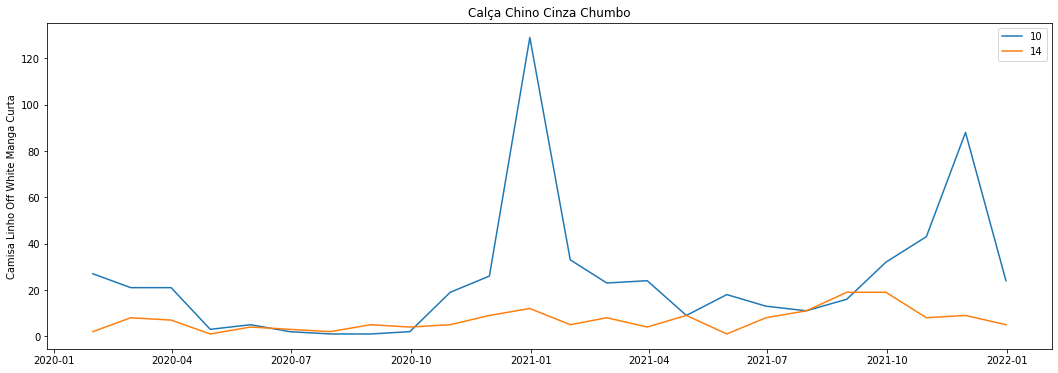

In [49]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[ df.columns[ 10 ] ], label=10 )
sns.lineplot( x=df.index, y=df[ df.columns[ 14 ] ], label=14 )
plt.title( df.columns[ 2 ] )
plt.legend()

plt.show()

# Predict

In [50]:
produto = df.columns[14]

model = pm.auto_arima(df[produto], seasonal=True, m=4)

print(model.summary())



                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0, 4)   Log Likelihood                 -60.684
Date:                 Wed, 31 Aug 2022   AIC                            127.369
Time:                         15:16:42   BIC                            130.356
Sample:                     01-31-2020   HQIC                           127.952
                          - 12-31-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6211      1.352      1.939      0.052      -0.028       5.270
ar.S.L4       -0.8032      0.230     -3.500      0.000      -1.253      -0.353
sigma2        20.5598      8.359      2.460 

In [52]:
fc, conf_int = model.predict(n_periods=5, return_conf_int=True)
print(fc, conf_int)

2022-01-31     7.162802
2022-02-28    10.621051
2022-03-31    13.227523
2022-04-30    18.866355
2022-05-31    19.291917
Freq: M, dtype: float64 [[-1.72425284 16.04985765]
 [ 1.7339956  19.50810608]
 [ 4.34046765 22.11457813]
 [ 9.97929994 27.75341042]
 [10.23445931 28.34937425]]


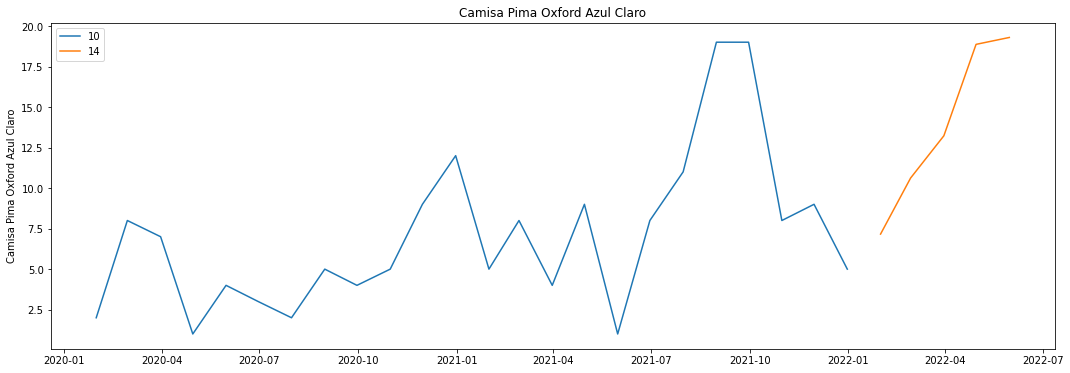

In [55]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[produto], label=10 )
sns.lineplot( x=fc.index, y=fc.values, label=14 )
plt.title( produto )
plt.legend()

plt.show()

# Next

ALgumas sugestões... afinal o trabalho é de vocês (rs)

1. Empreguem mais valores, para a detecção de sazonalizades o recomendado é ter ao menos 4 períodos
2. Que decisão vão tomar sobre os valores nulos?
3. Veriquem outras métricas o AIC é apenas uma delas
4. Produzir um referencial teórico (um texto) sobre o modelo arima e métricas
5. Distribuir os produtos nas categorias XYZ, de modo semelhante ao que fizeram o ABC
8. Vale a pena comparar os resultados CV X AIC, do mesmo modo que fizeram para o CV X R2. O R2 não vamos mais usar daqui pra diante.
9. CV e AIC já busquem descrever vantagens e desvantagens de empregar um ou outro.
10. E aí, encaram fazer uma separação de dados de dados treinamento e teste para medir os resíduos e empregar isso para como mais uma métrica?